Converting image from RGBA to grayscale
Resizing image from (768, 1024) to (500, 500)


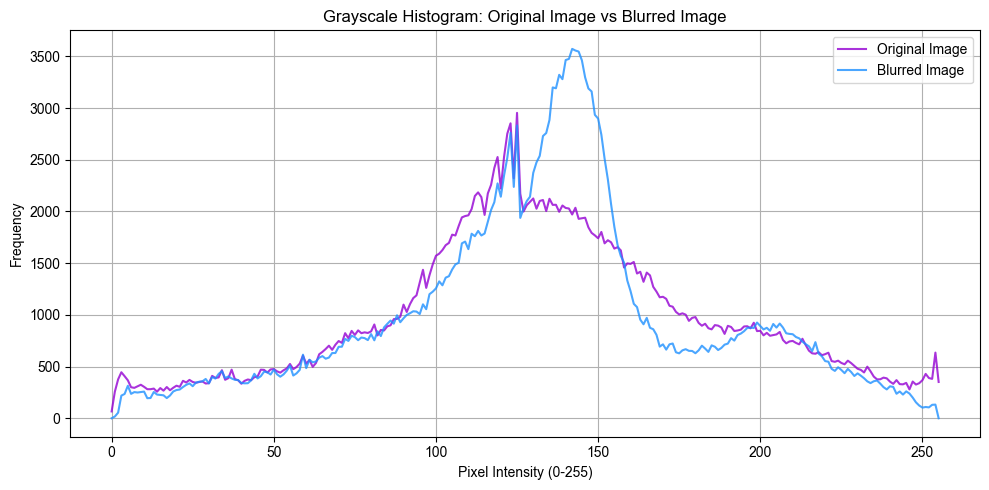

Statistical Comparison using T-test:
T-statistic: 0.0000
P-value: 1.0000e+00
Result: No statistically significant difference between histograms.


In [1]:
# used ChatGPT to initially generate this code, made changes using my own knowledge

import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the image
image_input = 'alfie_greyscale.png'  # Replace with your image path
image = Image.open(image_input)

# Check if the image is in grayscale, convert if not
if image.mode != 'L':
    print(f"Converting image from {image.mode} to grayscale")
    gray_original = image.convert('L')
else:
    gray_original = image

# Check if the image is 500x500, convert if not
if gray_original.size != (500, 500):
    print(f"Resizing image from {gray_original.size} to (500, 500)")
    resized_gray_image = gray_original.resize((500, 500))
else:
    resized_gray_image = gray_original

# Create blurred image using GaussianBlur
blurred_image = resized_gray_image.filter(ImageFilter.GaussianBlur(radius=2))

# Check and convert blurred to grayscale and 500x500
if blurred_image.mode != 'L' and blurred_image.size != (500, 500):
    print(f"Converting blurred image from {blurred_image.mode} to grayscale and resizing to (500, 500)")
    gray_resized_blurred_image = blurred_image.convert('L').resize((500, 500))
else:
    gray_resized_blurred_image = blurred_image

# Convert to numpy arrays
orig_array = np.array(resized_gray_image)
blurred_array = np.array(gray_resized_blurred_image)

# Compute histograms
orig_hist, bins = np.histogram(orig_array.flatten(), bins=256, range=(0, 256))
blurred_hist, _ = np.histogram(blurred_array.flatten(), bins=256, range=(0, 256))

# Set the font to Arial for better readability
plt.rcParams['font.family'] = 'Arial'

# Plot histograms
plt.figure(figsize=(10, 5))
plt.plot(orig_hist, label='Original Image', color='darkviolet', alpha=0.8)
plt.plot(blurred_hist, label='Blurred Image', color='dodgerblue', alpha=0.8)
plt.title('Grayscale Histogram: Original Image vs Blurred Image')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical test: Independent T-Test
stat, p_value = ttest_ind(orig_hist, blurred_hist, equal_var=False)

# Print results
print("Statistical Comparison using T-test:")
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Statistically significant difference between histograms.")
else:
    print("Result: No statistically significant difference between histograms.")

# Save the blurred image
blurred_image.save(f'blurred_{image_input}.png')

# Save downscaled version (250x250)
blurred_image_250 = blurred_image.resize((250, 250), Image.LANCZOS)
blurred_image_250.save(f'blurred_{image_input}250x250.png')